# The Butterfly Effect

Chloe Cousin - Online Jan 24 Data Science cohort

- __Sprint__: 2 - more advanced preprocessing, EDA and baseline model creation
- __Date__: April 2, 2024

# Introduction

## Imports

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

## Datasets

### D1 - Butterfly sightings / Traits / Vulnerable Species

This dataset has been preprocessed in Sprint 1 (see 'Capstone - Sprint 1' Jupyter notebook), we are importing the cleaned file here.

NOTE : EXPLIQUER CE QUI A ETE FAIT

In [53]:
df = pd.read_csv('data/df_NBN_UKBMS4.csv')

In [59]:
pd.set_option('display.max_columns', None)

In [60]:
df.head()

,Unnamed: 0,Occurrence_ID,Scientific_name,Common_name,Start_date,Start_date_day,Start_date_month,Start_date_year,OSGR,Latitude_WGS84,Longitude_WGS84,Family,Genus,OSGR_100km,OSGR_10km,OSGR_2km,OSGR_1km,State/Province,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,Voltinism,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,Red_List_category,2010_Red_List_category,Year_Month
0,0,5616398,Gonepteryx rhamni,Brimstone,2009-03-16,16,3,2009,TL2550,52.138550,-0.167627,Pieridae,Gonepteryx,TL,TL25,TL25K,TL2550,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
1,1,7628186,Gonepteryx rhamni,Brimstone,2009-03-18,18,3,2009,SU8533,51.094445,-0.780437,Pieridae,Gonepteryx,SU,SU83,SU83L,SU8533,England,5.2,6.40,5.2,6.40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,11.0,B,Mixed canopy (open affinity),Edge-associated (strong),Moisture association varies,Disturbance-associated (strong),2.0,Least Concern,Least Concern,2009-03-01
2,2,5815274,Polygonia c-album,Comma,2009-03-22,22,3,2009,TQ1684,51.547376,-0.321280,Nymphalidae,Polygonia,TQ,TQ18,TQ18S,TQ1684,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01
3,3,5616417,Pieris brassicae,Large White,2009-03-07,7,3,2009,ST7913,50.920590,-2.293015,Pieridae,Pieris,ST,ST71,ST71W,ST7913,England,5.1,5.85,4.9,5.65,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Mixed canopy (open affinity),Seen near and away from edges,Xeric-associated (weak),Disturbance-associated (strong),6.0,Least Concern,Least Concern,2009-03-01
4,4,5616482,Polygonia c-album,Comma,2009-03-19,19,3,2009,SU6469,51.420852,-1.073789,Nymphalidae,Polygonia,SU,SU66,SU66P,SU6469,England,4.0,5.20,4.1,4.90,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12.0,M,Canopy generalist,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,Least Concern,Least Concern,2009-03-01


In [11]:
df.shape

(6392186, 44)

London coordinates: 51.5069929036787, -0.12895107981895967

- North limit (Enfield borough): 51.65195042315941, -0.08106613267368643
- West limit (Hillington borough): 51.537921096083025, -0.45221704012735686 
- South limit (Croydon borough): 51.3769109423846, -0.09758628303502302
- East Limit (Upminster): 51.55626396921364, 0.24955389351473162

In [45]:
London_coord = {'North limit (Enfield borough)': [51.65195042315941, -0.08106613267368643],
                'West limit (Hillington borough)': [51.537921096083025, -0.45221704012735686],
                'South limit (Croydon borough)': [51.3769109423846, -0.09758628303502302], 
                'East Limit (Upminster)': [51.55626396921364, 0.24955389351473162]}
London_coord_df = pd.DataFrame(London_coord, index=['Latitude', 'Longitude']).T
London_coord_df

,Latitude,Longitude
North limit (Enfield borough),51.651950,-0.081066
West limit (Hillington borough),51.537921,-0.452217
South limit (Croydon borough),51.376911,-0.097586
East Limit (Upminster),51.556264,0.249554


In [51]:
print(f"Min Lat value: {London_coord_df['Latitude'].min()}")
print(f"Max Lat value: {London_coord_df['Latitude'].max()}")
print(f"Min Lon value: {London_coord_df['Longitude'].min()}")
print(f"Max Lon value: {London_coord_df['Longitude'].max()}")

Min Lat value: 51.3769109423846
Max Lat value: 51.65195042315941
Min Lon value: -0.45221704012735686
Max Lon value: 0.24955389351473162


In [56]:
GLondon_df = df[(df['Latitude_WGS84'] >= London_coord_df['Latitude'].min()) & \
                (df['Latitude_WGS84'] <= London_coord_df['Latitude'].max()) & \
                (df['Longitude_WGS84'] >= London_coord_df['Longitude'].min()) & \
                (df['Longitude_WGS84'] <= London_coord_df['Longitude'].max())]

In [63]:
GLondon_df.describe()

,Unnamed: 0,Occurrence_ID,Start_date_day,Start_date_month,Start_date_year,Latitude_WGS84,Longitude_WGS84,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,FlightDuration,NumberOfHostplantFamilies
count,1.628870e+05,1.628870e+05,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000,162887.000000
mean,3.170521e+06,4.165022e+06,15.594510,6.709259,2012.240627,51.501557,-0.180515,3.110379,4.483747,3.599826,4.326599,0.416368,0.498229,0.843603,0.714409,0.964970,0.915021,0.989809,0.915021,0.965160,0.824154,0.408461,0.299214,8.754419,4.187885
std,1.868239e+06,2.476279e+06,8.773763,1.394315,5.550457,0.073003,0.149540,1.613779,1.038287,0.875043,1.012160,0.492958,0.499998,0.363232,0.451697,0.183857,0.278852,0.100436,0.278852,0.183375,0.380690,0.491551,0.457915,2.890142,4.537040
min,2.000000e+00,6.000000e+00,1.000000,3.000000,2001.000000,51.379167,-0.440290,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.504594e+06,1.829190e+06,8.000000,6.000000,2008.000000,51.438260,-0.281758,2.350000,3.800000,3.400000,3.800000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,7.000000,1.000000
50%,3.161843e+06,4.888200e+06,16.000000,7.000000,2013.000000,51.497967,-0.182863,3.700000,4.500000,3.600000,4.400000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,9.000000,2.000000
75%,4.803384e+06,6.374192e+06,23.000000,8.000000,2017.000000,51.562974,-0.034953,3.900000,4.700000,3.900000,4.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,6.000000
max,6.392172e+06,8.168492e+06,31.000000,10.000000,2020.000000,51.649494,0.124656,5.900000,7.600000,5.500000,6.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,24.000000


In [64]:
GLondon_df.shape

(162887, 44)

### D2 - UK Weather

In [9]:
df_london_weather = pd.read_fwf('data/heathrowdata.txt')

In [12]:
df_london_weather.head()

,yyyy,mm,tmax,tmin,af,rain,sun
0,1948,1,8.9,3.3,---,85.0,---
1,1948,2,7.9,2.2,---,26.0,---
2,1948,3,14.2,3.8,---,14.0,---
3,1948,4,15.4,5.1,---,35.0,---
4,1948,5,18.1,6.9,---,57.0,---


In [14]:
df_london_weather.shape

(914, 7)

### D3 - UK Weighted Sightings

In [43]:
df_Sightings_Year_Weighted = pd.read_csv('data/Sightings_year_weighted.csv')

In [44]:
df_Sightings_Year_Weighted.head()

,Unnamed: 0,index,Start_date_year,count,weight,counts_weighted
0,0,19,2001,130298,1.000000,130298.0
1,1,18,2002,180762,1.384458,130565.0
2,2,12,2003,248854,1.691614,147110.0
3,3,15,2004,219536,1.592325,137871.0
4,4,16,2005,217008,1.713466,126649.0


In [45]:
df_Sightings_Year_Weighted.shape

(20, 6)

In [46]:
df_Sightings_Year_Weighted['Start_date_year'].min()

2001

In [47]:
df_Sightings_Year_Weighted['Start_date_year'].max()

2020

# Weather / Sightings correlation?

Notes: Test with London temperatures for whole UK Sightings - need to be updated to UK weather data

In [48]:
df_london_weather2 = df_london_weather[(df_london_weather['yyyy'] >= 2001) & (df_london_weather['yyyy'] <= 2020)]
df_london_weather2

,yyyy,mm,tmax,tmin,af,rain,sun
636,2001,1,7.1,1.8,9,75.2,87.0
637,2001,2,9.2,2.8,5,69.6,92.3
638,2001,3,9.5,3.8,3,95.3,78.2
639,2001,4,12.8,5.4,0,66.5,38.5
640,2001,5,18.8,9.1,0,26.0,28.0
...,...,...,...,...,...,...,...
871,2020,8,25.6,15.6,0,58.2,61.8
872,2020,9,21.6,11.2,0,20.0,68.9
873,2020,10,15.1,8.8,0,142.2,51.6
874,2020,11,12.7,6.2,2,50.2,44.6


In [64]:
df_london_weather2 = pd.DataFrame(df_london_weather2.groupby('yyyy')['tmax'].mean()).reset_index()

In [51]:
# Merge Sightings and Weather
df_Sightings_Year_Weighted2 = pd.merge(df_Sightings_Year_Weighted, df_london_weather2, left_on='Start_date_year', right_on='yyyy', 
                                       how='left')

In [58]:
df_Sightings_Year_Weighted2 = df_Sightings_Year_Weighted2.drop(columns=['Unnamed: 0', 'index', 'count', 'weight', 'yyyy'])

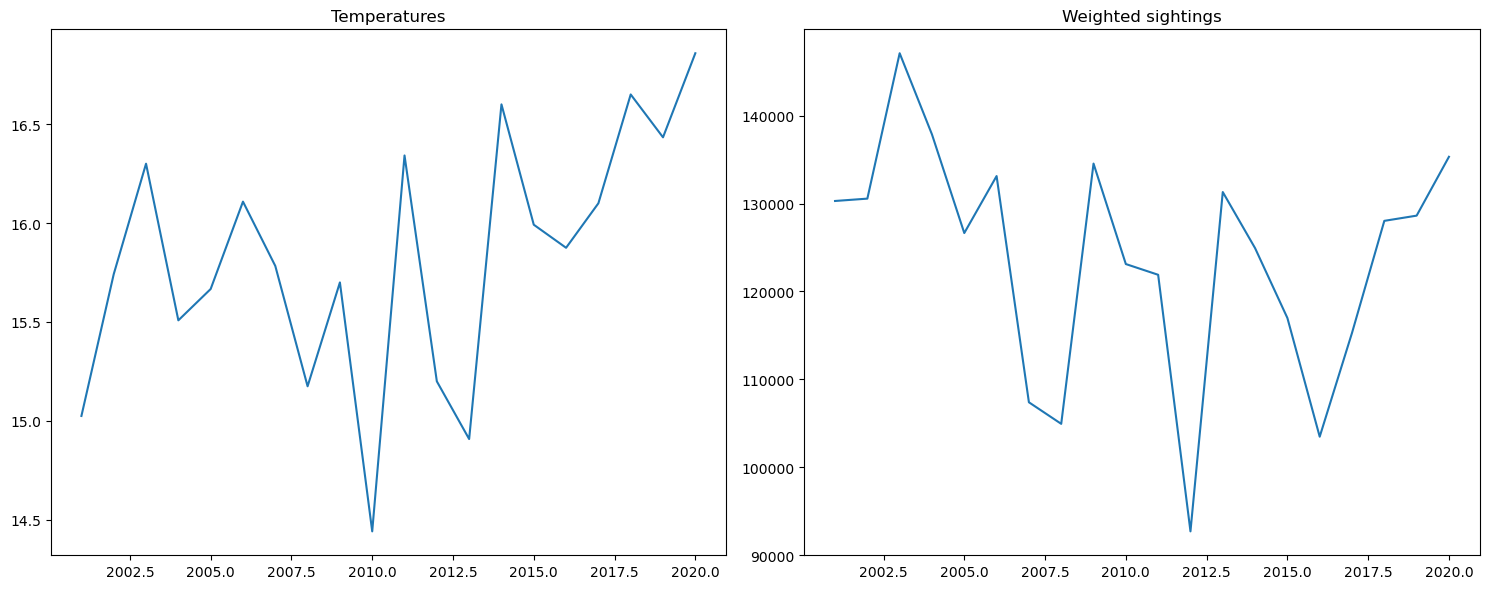

In [69]:
plt.subplots(1,2, figsize=[15,6])

plt.subplot(1,2,1)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['tmax'])
plt.title('Temperatures')

plt.subplot(1,2,2)
plt.plot(df_Sightings_Year_Weighted2['Start_date_year'], df_Sightings_Year_Weighted2['counts_weighted'])
plt.title('Weighted sightings')

plt.tight_layout()
plt.show()

<Axes: >

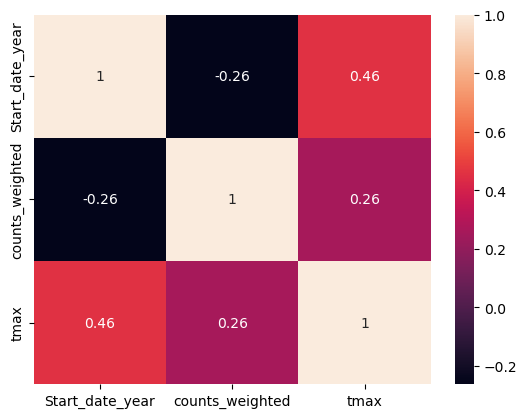

In [59]:
sns.heatmap(df_Sightings_Year_Weighted2.corr(), annot=True)

In [57]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['counts_weighted'])

PearsonRResult(statistic=0.2578815623641065, pvalue=0.27232610692678505)

In [60]:
stats.pearsonr(df_Sightings_Year_Weighted2['tmax'], df_Sightings_Year_Weighted2['Start_date_year'])

PearsonRResult(statistic=0.4564797979261581, pvalue=0.04305886583703847)

# Test Var Model

In [7]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
mdata = sm.datasets.macrodata.load_pandas().data
mdata.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [13]:
# prepare the dates index
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
quarterly.head()

0    1959Q1
1    1959Q2
2    1959Q3
3    1959Q4
4    1960Q1
dtype: object

In [14]:
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
quarterly

[datetime.datetime(1959, 3, 31, 0, 0),
 datetime.datetime(1959, 6, 30, 0, 0),
 datetime.datetime(1959, 9, 30, 0, 0),
 datetime.datetime(1959, 12, 31, 0, 0),
 datetime.datetime(1960, 3, 31, 0, 0),
 datetime.datetime(1960, 6, 30, 0, 0),
 datetime.datetime(1960, 9, 30, 0, 0),
 datetime.datetime(1960, 12, 31, 0, 0),
 datetime.datetime(1961, 3, 31, 0, 0),
 datetime.datetime(1961, 6, 30, 0, 0),
 datetime.datetime(1961, 9, 30, 0, 0),
 datetime.datetime(1961, 12, 31, 0, 0),
 datetime.datetime(1962, 3, 31, 0, 0),
 datetime.datetime(1962, 6, 30, 0, 0),
 datetime.datetime(1962, 9, 30, 0, 0),
 datetime.datetime(1962, 12, 31, 0, 0),
 datetime.datetime(1963, 3, 31, 0, 0),
 datetime.datetime(1963, 6, 30, 0, 0),
 datetime.datetime(1963, 9, 30, 0, 0),
 datetime.datetime(1963, 12, 31, 0, 0),
 datetime.datetime(1964, 3, 31, 0, 0),
 datetime.datetime(1964, 6, 30, 0, 0),
 datetime.datetime(1964, 9, 30, 0, 0),
 datetime.datetime(1964, 12, 31, 0, 0),
 datetime.datetime(1965, 3, 31, 0, 0),
 datetime.datetime(

In [16]:
In [10]: mdata = mdata[['realgdp','realcons','realinv']]
mdata.head()

,realgdp,realcons,realinv
0,2710.349,1707.4,286.898
1,2778.801,1733.7,310.859
2,2775.488,1751.8,289.226
3,2785.204,1753.7,299.356
4,2847.699,1770.5,331.722


In [19]:
import pandas 
mdata.index = pandas.DatetimeIndex(quarterly)
mdata.head()

,realgdp,realcons,realinv
1959-03-31,2710.349,1707.4,286.898
1959-06-30,2778.801,1733.7,310.859
1959-09-30,2775.488,1751.8,289.226
1959-12-31,2785.204,1753.7,299.356
1960-03-31,2847.699,1770.5,331.722


In [27]:
import numpy as np
data = np.log(mdata).diff().dropna()
data.tail()

,realgdp,realcons,realinv
2008-09-30,-0.006781,-0.008948,-0.017836
2008-12-31,-0.013805,-0.007843,-0.069165
2009-03-31,-0.016612,0.001511,-0.175598
2009-06-30,-0.001851,-0.002196,-0.067561
2009-09-30,0.006862,0.007265,0.020197


In [24]:
model = VAR(data)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


In [25]:
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 20, Mar, 2024
Time:                     20:16:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.172
L1.realgdp         -0.279435         0.169663           -1.647           0.100
L1.realcons         0.675016         0.131285            5.142    

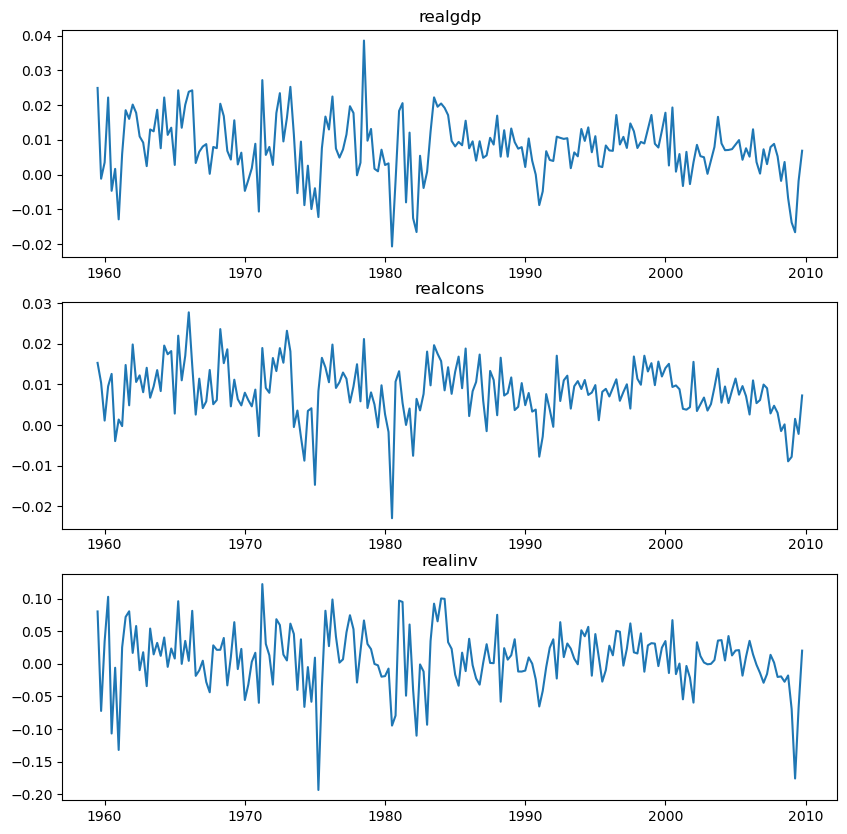

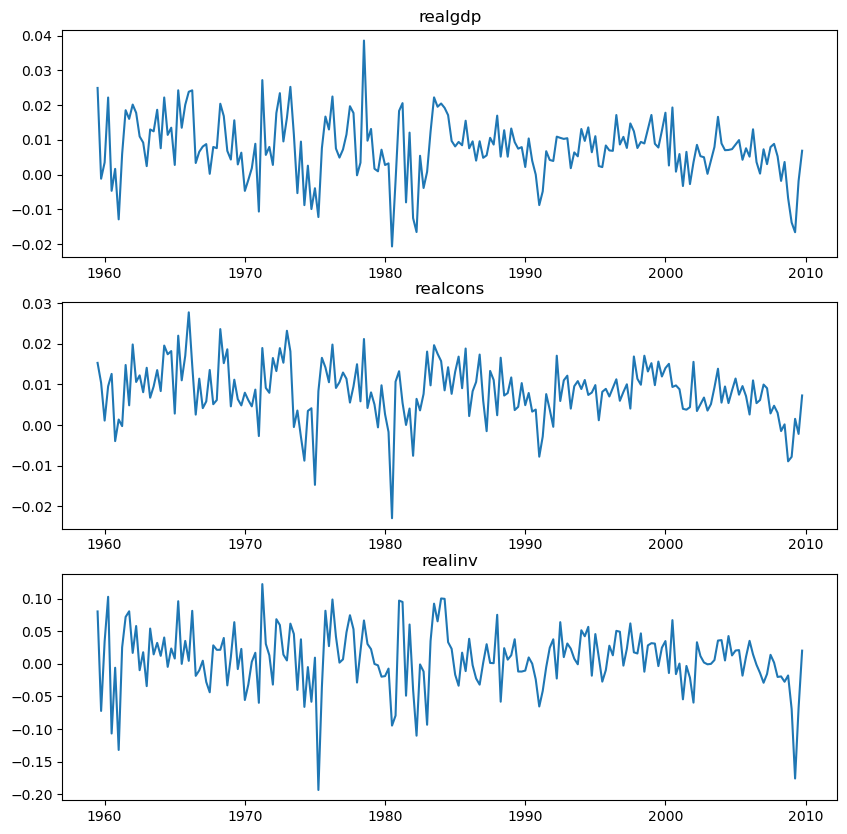

In [26]:
results.plot()

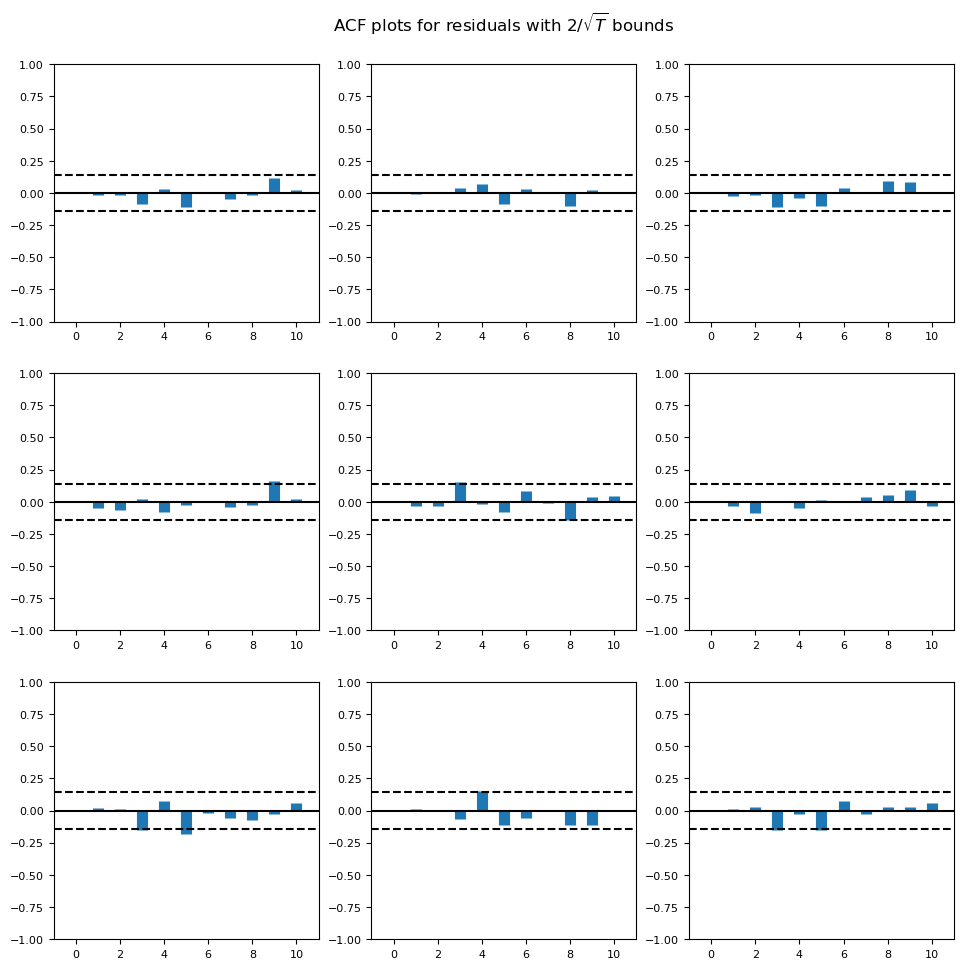

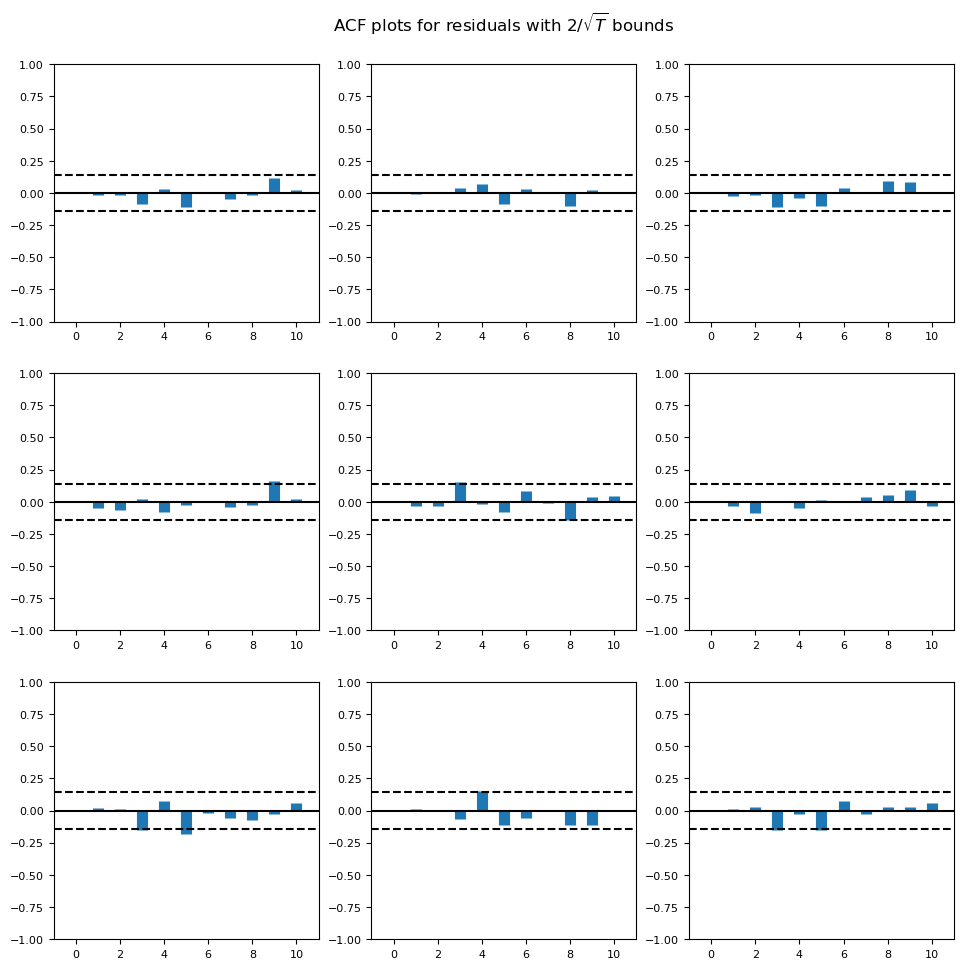

In [28]:
results.plot_acorr()

In [29]:
model.select_order(15)

In [34]:
results.test_causality('realgdp', ['realinv', 'realcons'], kind='wald', signif=0.9)